# Assignment 1

## Lecture 1 & 2 - Introduction & Regression

## Learning Goals
After successfully completing this assignment, you should be able to:

- represent and manipulate numeric data using [`numpy`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) arrays 
- represent and manipulate data using [`pandas`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) dataframes 
- load data from a .csv file 
- be able to learn a linear hypothesis to predict labels of datapoints
- be able to learn a polynomial hypothesis to predict labels of datapoints
- understand the effect of enlarging the model on the resulting training error
- understand the effect of enlarging the training set on the resulting training error


# Table of Contents
1. [Python basics](#Python-basics)
2. [Linear Regression](#Linear-Regression)


# General Instruction

- Jupyter notebook is supposed to be run cell by cell in order, please do not skip any code cell, this will cause some errors. Also running cells back and forth sometimes might also incur errors. If you feel lost your track, you can click "Kernel->Restart" from the menu to restart the process.
- Before submitting your assignment, ensure that it does not contain trivial errors by pressing the "validate" button at the top.
- Your implementations are supposed to be added to the places where it reads "YOUR CODE HERE". Please also remove the "raise NotImplementedError()" line before submitting.
- Please do NOT change the metadata of any cell, cells for demo and instructions are not editable.
- You can copy lines of code from cells that are not editable, but please do NOT copy and paste them as cells, this may incur validation error.
- You can add extra cells or code to help double-check your solution, but please make sure that variables required by tasks are not overwritten, or just delete those extra cells before submitting.
    Remember that demos in previous assignments may also be helpful to solve tasks in the present notebook.

# Python basics

In [31]:
import numpy as np                   # import numpy package under shorthand "np"
import pandas as pd                  # import pandas package under shorthand "pd"
import matplotlib.pyplot as plt
from nose.tools import assert_equal
from numpy.testing import assert_array_equal

# Regression import 

%config Completer.use_jedi = False  # enable code auto-completion
from sklearn.preprocessing import PolynomialFeatures    # function to generate polynomial and interaction features
from sklearn.linear_model import LinearRegression    # classes providing Linear Regression with ordinary squared error loss and Huber loss, respectively
from sklearn.metrics import mean_squared_error    # function to calculate mean squared error 

## Representing Data as Numpy Arrays

Data consists of many individual datapoints. Each datapoint is characterized by features and labels. Let us assume that the features of a datapoint is a finite list of numbers $x_{1},\ldots,x_{n} \in \mathbb{R}$. We can represent such a finite list of numbers conveniently using a numeric or [`numpy`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html?highlight=ndarray#numpy.ndarray) array. 

For instance, we could have a feature vector `np.array([60.1699, 24.9384])` representing the coordinates of Helsinki, and a label `np.array([5.0])` representing average yearly temperature.
In general, the feature vector $\mathbf{x} = \big(x_{1},\ldots,x_{n} \big)^{T} \in \mathbb{R}^{n}$ can be represented by a 1 dimensional `numpy` array `x = np.array([x1,...,xn])`. 

This course will use mainly `numpy` arrays with 1 or 2 dimensions, representing vectors and matrices, respectively. We represent an $m \times n$ matrix, i.e., with $m$ rows and $n$ columns, using a 2 dimensional `numpy`array with shape `(m,n)`. The Python code `A=np.array([[1,1,1],[2,2,2]])` creates a `numpy` array of shape `(2, 3)`, representing the matrix 
$$
A= \begin{pmatrix}
1 & 1 & 1\\
2 & 2 & 2
\end{pmatrix}
$$

One key attribute of an [`numpy.ndarray`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html?highlight=ndarray#numpy.ndarray) object `x` is its shape, which is stored in the attribute `x.shape`. The shape `x.shape` is a tuple of integers $s_{0},\ldots,s_{d-1}$ that indicates the extent (size/length) of the `numeric` array in different dimensions. The first entry $s_{0}$ of the list `x.shape` is the extent in the first dimension (dimension "0"), the second entry $s_{1}$ is the extent of `x` in the second dimension (dimension "1"). Note that `np.array([1,2,3]).shape` returns `(3,)` which represents a vector, but `np.array([[1,2,3]]).shape` returns `(1, 3)` which represents a matrix.



For more information:

- [Numpy Documentation](https://numpy.org/doc/stable/index.html)
- [What is Numpy?](https://numpy.org/doc/stable/user/whatisnumpy.html)
- [Numpy Basics](https://numpy.org/doc/stable/user/basics.html)
- [Visualization](https://stackoverflow.com/questions/48200911/very-basic-numpy-array-dimension-visualization)

In the task below you will be asked to do some simple operations in numpy that will be necessary to know for the duration of the course. 

<div class=" alert alert-warning">
    
## Student Task A1.1

- Create a `numpy` array `x` that represents the vector $\mathbf{x} = \big(5, 4, 3\big)^{T}$ and another `numpy` array `y` that represents the vector $\mathbf{y} = \big( 4, 3, 2 \big)^{T}$.
- Complete the function `sum_matrix` which should read in two `numpy` arrays of the same shape. The function should return a `numpy` array with the same shape of the inputs and whose entries are sums of the corresponding entries in the two input arrays. 
- Similar to `sum_matrix`, complete the function `product_matrix` that returns a `numpy` array whose entries are products of the entries of the input `numpy` arrays. 
- NOTE: In this exercise we equate 1-dimensional numpy arrays with column vectors, DO NOT create arrays with e.g. shape $\big(1, 3 \big)$.
</div>

In [32]:
## create numpy arrays as:
# x = np.array(...)  # input: a list
# y = np.array(...)  # input: a list

x = np.array([5,4,3])
y = np.array([4,3,2])

print(x,y)

def sum_matrix(x,y):  
    """
    Parameters:
    x -- a numpy array
    y -- a numpy array
    
    Returns:
    a numpy array representing the element-wise sum of x and y
    """
    return x + y
    

def product_matrix(x,y):
    """
    Parameters:
    x -- a numpy array
    y -- a numpy array
    
    Returns:
    a numpy array representing the element-wise product of x and y
    """
    return x * y

[5 4 3] [4 3 2]


In [33]:
# this cell is for tests, please leave it as it is

# Sanity check number of dimensions

assert x.ndim == 1 and y.ndim == 1, "Dimensionality of the created arrays is not correct"

# Sanity check that the functions are returning the correct data type

assert isinstance(sum_matrix(x, y), np.ndarray), "Function sum_matrix should return a numpy array"
assert isinstance(product_matrix(x, y), np.ndarray), "Function product_matrix should return a numpy array"


<div class=" alert alert-warning">

## Student Task A1.2


Create a `numpy` array `A` of shape `(3, 2)` that represents the $3 \times 2$ integer matrix 

\begin{pmatrix}
1 & 2\\
3 & 4\\
5 & 6
\end{pmatrix}

Complete the three functions in the code snippet:

 - `first_row` that should return a 1-D `numpy` array that represents the first row of the matrix corresponding to the input array. 

 -  `second_column` that should return 1-D `numpy` array ... second column ...
    
 -  `second_row_and_column` that should return a single number which is contained in the second row and second column of the input matrix.
    
</div>

In [34]:
## create a 2-D numpy array as:
# A = ...
A = np.array([[1,2],[3,4],[5,6]])

In [35]:
def first_row(A): 
    '''
    Parameter:
    A -- a numpy array
    
    Returns:
    the first row of A
    '''
    return A[0]

def second_column(A): 
    '''
    Parameter:
    A -- a numpy array
    
    Returns:
    the second column of A
    '''
    return A[:,1]

def second_row_and_column(A): 
    '''
    Parameter:
    A -- a numpy array
    
    Returns:
    the second row and second column of A, a float
    '''
    return A[1,1]


In [36]:
## this cell is for tests, please leave it as it is

# Sanity check the data type and the shape
assert isinstance(A, np.ndarray), "A has incorrect type"
assert A.shape == (3, 2), "A has incorrect shape"

# Sanity check that the functions are returning the correct data type

assert isinstance(first_row(A), np.ndarray), "Function first_row should return a numpy array"
assert isinstance(second_column(A), np.ndarray), "Function second_column should return a numpy array"
assert isinstance(second_row_and_column(A), np.integer), "Function second_row_and_column should return an integer"


<div class=" alert alert-warning">

## Student Task A1.3 

- Create a `numpy` array `B` of shape `(2,2)` that represents the matrix 
\begin{pmatrix}
1 & 3 \\
5 & 7 
\end{pmatrix}
- Create a `numpy` array `C` of shape `(2,2)` that represents the matrix 
\begin{pmatrix}
2 & 4 \\
6 & 8 
\end{pmatrix}
- Complete the function `matrix_mult` which reads in `numpy` arrays `B` and `C` and returns a `numpy` array that represents the [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication) of the matrices represented by `B` and `C`.
    
</div>

In [37]:
## create two numpy arrays as:
# B = ...
# C = ...
B = np.array([[1,3],[5,7]])
C = np.array([[2,4],[6,8]])

def matrix_mult(B,C): 
    '''
    Parameters:
    B -- a numpy array
    C -- a numpy array
    
    Returns:
    the result of matrix multiplying of B and C
    '''
    return np.matmul(B,C)
    

In [38]:
# this cell is for tests

# Sanity check that the function matrix_mult is returning the correct data type

assert isinstance(matrix_mult(B, C), np.ndarray), "Function matrix_mult should return a numpy array"


<div class=" alert alert-warning">
    
## Student Task A1.4
    
Consider the code line `A=np.array([[1, 0], [0, 1], [1, 1]])` which creates a `numpy` array `A`. What is the shape of the `numpy` array? (Set the variable `Answer` to the index of the correct answer) 
   
* answer 1: the shape is `(3, 2)`.
* answer 2: the shape is `(2, 1)`.
    
</div>

In [39]:
## set Answer to the index of the correct answer (e.g., Answer = 1 if you think answer 1 is correct):
# Answer = ... # either 1 or 2

Answer = 1


In [40]:
# this cell is for tests

# Sanity check the data type
assert isinstance(Answer, int), "The answer should be an integer"


<div class=" alert alert-info" >
    
### Demo
    
A frequently used method of ndarray is [ndarray.reshape()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.reshape.html), it returns a new shape to an array without changing its data. The mandatory parameter of `.reshape()` is 'shape' which should be the new shape represented by an int or a tuple of ints, it should be compatible with the original shape. If an integer, then the result will be a 1-D array of that length. One shape dimension can be -1, in this case, the value is inferred from the length of the array and remaining dimensions.
</div>

In [41]:
# create a 1-D numpy array
P = np.array([1, 2, 3, 4, 5, 6, 7, 8])  
print('P:\n', P)
print('The shape of P is: ', P.shape)   

# reshape P to a 2-D array, the size of the second dimension is 1, the first dimension is inferred
P_1 = P.reshape((-1, 1)) 
print('\nP_1:\n', P_1)
print('The shape of P_1 is: ', P_1.shape)

# reshape P to a 2-D array with the shape (4, 2)
P_2 = P.reshape((4, 2))  
print('\nP_2:\n', P_2)
print('The shape of P_2 is: ', P_2.shape)

P:
 [1 2 3 4 5 6 7 8]
The shape of P is:  (8,)

P_1:
 [[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]
The shape of P_1 is:  (8, 1)

P_2:
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]
The shape of P_2 is:  (4, 2)


<div class=" alert alert-warning">
    
## Student Task A1.5
    
Your task is to reshape P to a new ndarray P_test with the shape (2, 4)
    
</div>


In [42]:
## apply the method P.rehshape() to create a new ndarray P_test with the shape (2, 4) as:
# P_test = P.reshape(...) # input: a tuple

P_test = P.reshape((2, 4))

print('P_test:\n', P_test)
print('\nThe shape of P_test is: ', P_test.shape)

P_test:
 [[1 2 3 4]
 [5 6 7 8]]

The shape of P_test is:  (2, 4)


In [43]:
# this cell is for tests

## Processing Data with Pandas

[Pandas](https://pandas.pydata.org/docs/) provides the class `DataFrame`. A dataframe is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns. We can think of `DataFrame` a table whose rows represent individual datapoints and whose columns represent different properties (which might be features or labels) of the datapoints. 

We can perform basic operations on rows/columns like selecting, deleting, adding, and renaming. You can find some example use cases for `DataFrame` below. For more practice with `pandas` there is great documentation in the [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) notebooks on their website.

In what follows, we will demonstrate the usage of a `DataFrame` on data provided by the Finnish Meteorological Institute (FMI) at https://en.ilmatieteenlaitos.fi/download-observations. We have downloaded hourly weather observations at the FMI station Otsjoki Nuorgam during 01.06.2021 and 31.08.2021. The data is stored in the file `air_temp.csv` which is located in the same directory as this notebook.


In [44]:
# read in data from the file "air_temp.csv" and store it 
# in the DataFrame "df"

df = pd.read_csv('air_temp.csv')

# print the first 5 weather recordings in the DataFrame `df`

df.head(5)  

,Year,m,d,Time,Time zone,Air temperature (degC)
0,2021,6,1,00:00,UTC,6.2
1,2021,6,1,01:00,UTC,6.4
2,2021,6,1,02:00,UTC,6.4
3,2021,6,1,03:00,UTC,6.8
4,2021,6,1,04:00,UTC,7.1


In [45]:
# print a concise summary of a DataFrame including the index dtype and columns, non-null values and memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    2209 non-null   int64  
 1   m                       2209 non-null   int64  
 2   d                       2209 non-null   int64  
 3   Time                    2209 non-null   object 
 4   Time zone               2209 non-null   object 
 5   Air temperature (degC)  2204 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 103.7+ KB


In [46]:
df=df.dropna(axis=0)  
data = df.assign(date = df["Year"].astype(str)+'-'+df["m"].astype(str)+'-'+df["d"].astype(str))
data = data.drop(['Year','m','d','Time zone'],axis=1)
data.head(10)
#data = data[['date','Time','Air temperature (degC)']]
#data.head(10)

,Time,Air temperature (degC),date
0,00:00,6.2,2021-6-1
1,01:00,6.4,2021-6-1
2,02:00,6.4,2021-6-1
3,03:00,6.8,2021-6-1
4,04:00,7.1,2021-6-1
5,05:00,7.6,2021-6-1
6,06:00,7.5,2021-6-1
7,07:00,8.1,2021-6-1
8,08:00,10.3,2021-6-1
9,09:00,12.8,2021-6-1


In [47]:
# change column names

df.columns=['year','month', 'day', 'time', 'time_zone','temperature'] 

# remove rows from dataframe "df" which contain missing values

df = df.dropna(axis=0) #rows are considered as axis 0

# concatenate the 3 columns "year", "month", "day" into a new column "date" in format e.g. 2022-01-26

data = df.assign(date = df["year"].astype(str)+'-'+df["month"].astype(str)+'-'+df["day"].astype(str))

# remove columns "year", "month", "day", "time_zone" that are not used 

data = data.drop(['year','month','day','time_zone'],axis=1)  #columns are axis 1

# switch column order

data = data[['date','time','temperature']]

# print the last 5 weather recordings of the new dataframe 

data.tail(5) 

,date,time,temperature
2204,2021-8-31,20:00,6.1
2205,2021-8-31,21:00,6.4
2206,2021-8-31,22:00,6.2
2207,2021-8-31,23:00,5.6
2208,2021-9-1,00:00,5.5


In [48]:
# print some summary statistics of the rows in "data", such as mean, std, etc.

df.describe()

,year,month,day,temperature
count,2204.0,2204.000000,2204.000000,2204.000000
mean,2021.0,7.014065,15.837114,12.049365
std,0.0,0.814798,8.863532,5.021324
min,2021.0,6.000000,1.000000,0.500000
25%,2021.0,6.000000,8.000000,8.600000
50%,2021.0,7.000000,16.000000,11.150000
75%,2021.0,8.000000,24.000000,14.700000
max,2021.0,9.000000,31.000000,32.200000


Sometimes we are interested in a specific column of a DataFrame, e.g. we want to use it as feature/label. we can select a single column using `dataframe['column_name']`, this will return a [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.to_numpy.html#pandas.Series.to_numpy) object. Series object has a method `Series.to_numpy()` which will give us a NumPy ndarray representing the values in this Series. You will repeatedly use this method through this course.

In [ ]:
# Let us select only the column "temperature" of the DataFrame "data"
tmp = data['temperature'] 

print(type(tmp),'\n') # check the type of this object
print(tmp)

In [ ]:
data['temperature'].to_numpy() # extract the values stored in a specific column into a ndarray

We can select a single row by using dataframe.loc[ ] or dataframe.iloc[ ], the returned object is also Series.
dataframe.iloc[ ] and dataframe.loc[ ] in fact can be used in multiple ways to do dataframe slicing, for more details please read [the documentation](https://pandas.pydata.org/docs/reference/frame.html).

In [ ]:
# select the first weather recording (row) stored in the DataFrame "data"
firstrow = data.iloc[0]  # `0` is the index of the first row

print("The first row: \n",firstrow) 

# select the row with row label name `3` by using data.loc[ ]
# NOTE `3` is interpreted as a row label name , not an integer position along the index
# the row label name could be string or other data type, not only int
rowName3 = data.loc[3] 
print("\n The row with row label name '3': \n",rowName3) 

In [ ]:
# we can select a subset of a DataFrame on some condition and create a new DataFrame

# create a "newdataset" which consists only of weather recordings in "data" at "time" `03:00`
newdataset= data[data['time'] == '03:00'] ; 

# print randomly selected five weather recordings (rows) of "newdataset"
newdataset.sample(5) 

## Preparing Features and Labels from DataFrame

<div class=" alert alert-info" >

## Demo

Consider the weather observations recorded in `air_temp.csv` and loaded into the dataframe `data`. Let us now demonstrate how to define datapoints, their features and labels based on these weather observations. It is important to note that the choice (definition) of datapoints, their features and labels are design choices. 
    
We like to define a datapoint to represent an entire day, e.g., 
* first datapoint represents the day `2021-06-01`,
* second datapoint represents the day `2021-06-02`,
* third datapoint represents the day `2021-06-03`, 
* ...

The total number $m$ of datapoints is the number of days for which `data` contains weather recordings for daytime `01:00` and `12:00`. 
    
We characterize the $i$-th datapoint (day) using 
* the temperature recorded at 01:00 during the $i$th day as its feature $x^{(i)}$
* the temperature recorded at 12:00 during the $i$th day as its label $y^{(i)}$

We store the feature values $x^{(i)},i=1,\ldots,m$ in a (two-dimensional) numpy array `X_demo` with shape `(m,1)`. The feature value $x^{(i)}$ is stored in the entry `X_demo[i-1,0]` (note that indexing of numpy arrays starts with 0!). The label values $y^{(i)},i=1,\ldots,m$ are stored in a (one-dimensional) numpy array `y_demo` with shape `(m,)`. Finally, we generate a scatterplot where the $i$th datapoint is depicted by a dot located at coordinates $\big(x^{(i)},y^{(i)}\big)$. 

HINT: Reshape `X_demo` into a 2-D array by using array.reshape(-1, 1). This asks numpy to make the second dimension length one and automatically calculate the needed length of the first dimension so that the feature fits in the container which expects a 2-D array. (e.g.,the  .fit() method of [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit))
</div>

In [49]:
# create a list containing the dates for which at least one recording is contained in "data"
dates = data['date'].unique() 

features = []   # list used for storing features of datapoints
labels = []     # list used for storing labels of datapoints

m = 0    # number of datapoints created so far

# iterate through the list of dates for which we have weather recordings
for date in dates:
    datapoint = data[(data['date']==date)]  # select weather recordinds corresponding at day "date"
    row_f = datapoint[(datapoint.time=='01:00')]    # select weather recording at time "01:00"
    row_l = datapoint[(datapoint.time=='12:00')]    # select weather recording at time "12:00"
    if len(row_f)==1 and len(row_l)==1:
        feature = row_f['temperature'].to_numpy()[0]  # extract the temperature recording at "01:00" as feature
        label = row_l['temperature'].to_numpy()[0]    # extract the temperature recording at "12:00" as label
        features.append(feature)                  # add feature to list "features"
        labels.append(label)                      # add label to list "labels"
        m = m+1
        
X_demo = np.array(features).reshape(m,1)  # convert a list of len=m to a ndarray and reshape it to (m,1)
y_demo = np.array(labels) # convert a list of len=m to a ndarray 

print("number of datapoints:",m)
print("the shape of the feature matrix is: ",X_demo.shape)
print('the shape of the label vector is: ',y_demo.shape)

number of datapoints: 92
the shape of the feature matrix is:  (92, 1)
the shape of the label vector is:  (92,)


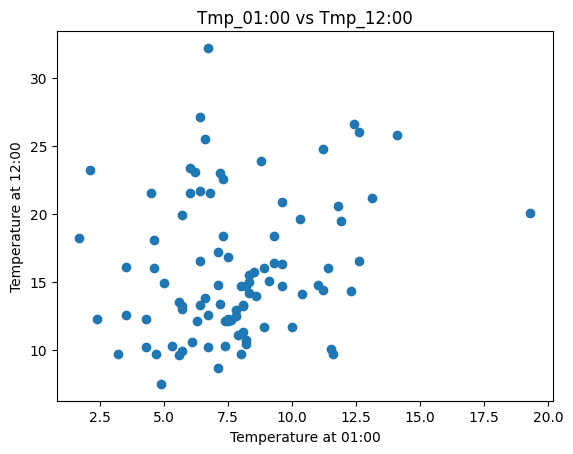

In [50]:
# visualize the datapoints
fig = plt.figure()  #create a figure

ax = fig.add_subplot(1, 1, 1) #add an axes object to the figure

ax.scatter(X_demo,y_demo) #plot a scatterplot in the axes to visualize the datapoints
ax.set_xlabel('Temperature at 01:00') # set the label of x axis
ax.set_ylabel('Temperature at 12:00') # 
ax.set_title('Tmp_01:00 vs Tmp_12:00')

plt.show()

# one line of code `plt.scatter(X_demo,y_demo)` without creating figure and axes objects 
# can also realize a scatter plot, but it's worth getting yourself familiar with the relation among figure, axes and plot

<div class=" alert alert-warning">

## Student Task A1.6

Consider the weather observations recorded in `air_temp.csv` and loaded into the dataframe `data`. 
We define a datapoint to represent an entire day, 
* First datapoint represents the day `2021-06-01`,
* Second datapoint represents the day `2021-06-02`,
* Third datapoint represents the day `2021-06-03`, 
* ...
    
The total number $m$ of datapoints is the number of days for which `data` contains weather recordings for daytime `11:00` and `12:00`. 
    
We characterize the $i$-th datapoint (day) using 
* The temperature recorded at 11:00 during the $i$th day as its feature $x^{(i)}$
* The temperature recorded at 12:00 during the $i$th day as its label $y^{(i)}$
    
Store the feature values in a numpy array `X` of shape `(m,1)` and the label values in a numpy array `y` of shape `(m,)`. 
    
</div>

In [51]:
## Generate your own datapoints with feature X = “tmp at 11:00” and label y = “tmp at 12:00"

dates = data['date'].unique()
features = []
labels = []

m = 0

for date in dates:
    datapoint = data[(data['date']==date)]
    row_f = datapoint[(datapoint.time=='11:00')]
    row_l = datapoint[(datapoint.time=='12:00')]
    if len(row_f)==1 and len(row_l)==1:
        feature = row_f['temperature'].to_numpy()[0]
        label = row_l['temperature'].to_numpy()[0]
        features.append(feature)
        labels.append(label)
        m = m+1

X = np.array(features).reshape(m,1)
y = np.array(labels)

# Sanity check to help you detect major mistakes
assert np.isclose(X[0, 0], 14.1), 'Feature matrix is incorrect'
assert X.shape == (91,1), 'The shape of feature matrix is incorrect'
assert y.shape == (91,), 'The shape of label vector is incorrect'

In [ ]:
#this cell is for tests, please leave it as it is.


# Linear Regression

Now, you have basic knowledge of how to load data and interact with python matrix operations. In this section we will focus on buliding linear regression. The learning golas are :

- be able to learn a linear hypothesis to predict labels of datapoints
- be able to learn a polynomial hypothesis to predict labels of datapoints
- understand the effect of enlarging the model on the resulting training error
- understand the effect of enlarging the training set on the resulting training error


<div class=" alert alert-warning">

## Student Task A1.7

Consider datapoints that represent the daily weather conditions at some place in Finland. We can characterize these datapoints using weather recordings from the [Finnish Meteorological Institute](https://en.ilmatieteenlaitos.fi/). For your convenience we have already downloaded and stored these recordings in the csv file `FMIData_Assignment1.csv`. This task requires you to first read in the weather recordings from this file and store them in a `pandas` dataframe with the name `FMIRawData`. 
    
Each row of dataframe `FMIRawData` contains a weather recording along with a time-stamp. We will use for each datapoint the weather recording with time-stamp `00:00`. For the $i$th day, we use the value in the column "Minimum temperature" as the feature $x^{(i)}$ and the value in the column "Maximum temperature" as the label $y^{(i)}$. You then have to collect the feature values in a two-dimensional numpy array `X` of shape `(m,1)` with `m` being the number of different datapoints (days) listed in `FMIData_Assignment1.csv`. Similarly, you have to collect the label values $y^{(i)}$, for $i=1,\ldots,m$ in a one-dimensional numpy array `y` of shape `(m)` (which is sometimes written as `(m,)`). 
</div>

<div class=" alert alert-warning">

As the very first step you need to use `pd.read_csv()` to load the weather recordings stored in the file `FMIData_Assignment1.csv` into a `pandas` dataframe `FMIRawData`.
</div>

In [52]:
## read in the data stored in the file 'FMIData_Assignment1.csv'

# FMIRawData = ...

FMIRawData = pd.read_csv('FMIData_Assignment1.csv')

# print the first 5 rows of the DataFrame 'FMIRawData'
FMIRawData.head(5)  

,Year,m,d,Time,Time zone,Precipitation amount (mm),Snow depth (cm),Air temperature (degC),Ground minimum temperature (degC),Maximum temperature (degC),Minimum temperature (degC)
0,2020,1,1,00:00,UTC,0.0,-1.0,1.5,NaN,3.4,-2.6
1,2020,1,1,06:00,UTC,NaN,NaN,NaN,-5.7,NaN,NaN
2,2020,1,2,00:00,UTC,-1.0,-1.0,3.6,NaN,5.1,1.8
3,2020,1,2,06:00,UTC,NaN,NaN,NaN,0.1,NaN,NaN
4,2020,1,3,00:00,UTC,1.2,-1.0,4.6,NaN,5.7,4.3


In [ ]:
## this cell is for tests, please leave it as it is

# sanity check the shape of FMIRawData
assert FMIRawData.shape == (1418,11)

In [ ]:
# print the column names
FMIRawData.columns

In [53]:
## execute some operations to make the dataframe layout tidy

# remove columns 'Time zone', 'Precipitation amount (mm)','Snow depth (cm)' that are not used 
# and return a new dataframe "data"
data = FMIRawData.drop(['Time zone', 'Precipitation amount (mm)','Snow depth (cm)'],axis=1)

# change column names
data.columns=['Year','Month', 'Day', 'Time', 'AirTemp','GroundMinTmp','MaxTemp','MinTemp'] 

# concatenate the 3 columns "Year", "Month", "Day" into a new column "Date" in format e.g. 2022-01-26
date_column = data["Year"].astype(str)+'-'+data["Month"].astype(str)+'-'+data["Day"].astype(str)
data.insert(0,"Date",date_column)

# drop useless columns NOTE: set inplace=True to do the operation inplace instead of retrun a new dataframe
data.drop(['Year','Month','Day'],axis=1,inplace=True)

data.head()

,Date,Time,AirTemp,GroundMinTmp,MaxTemp,MinTemp
0,2020-1-1,00:00,1.5,NaN,3.4,-2.6
1,2020-1-1,06:00,NaN,-5.7,NaN,NaN
2,2020-1-2,00:00,3.6,NaN,5.1,1.8
3,2020-1-2,06:00,NaN,0.1,NaN,NaN
4,2020-1-3,00:00,4.6,NaN,5.7,4.3


<div class=" alert alert-warning">


We next select only rows with time-stamp `"00:00"` and then select the values from relevant columns to build the feature matrix and label vector. 
Hints: 

- Select only weather recordings whose property `Time` is equal to `"00:00"` to create a new dataframe `newdata`.
  Here is a tutorial for how to select rows from pandas dataframe based on column values: [link](https://towardsdatascience.com/how-to-select-rows-from-pandas-dataframe-based-on-column-values-d3f5da421e93).

- Select the column `MinTemp` of the DataFrame `newdata` as features `X`(using capital x to denote a feature matrix is a convention) and `MaxTemp` as labels `y`. You can checkout this link to see more details about [how to select columns based on column names.](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html)
- Use the `Series.to_numpy()`method to convert the selected column to a NumPy array for both `X` and `y`.
- Reshape `X` into a 2D array by using array.reshape(-1, 1). This asks numpy to make the second dimension length one and automatically calculate the needed length of the first dimension so that the feature fits in the container which expects a 2D array. (For more details, please check the documentation of .fit() method of [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit)).
</div>

In [54]:
## 1. Filter rows of data using some condition
## Select only recordings whose property "Time" is equal to "00:00" and create a new dataframe named "newdata"

# newdata = data[...]  # NOTE: the dtype of column "Time" is string, 
newdata = data[data['Time'] == '00:00']
X = newdata['MinTemp'].to_numpy()
y = newdata["MaxTemp"].to_numpy()

## print the firt 5 rows
print("First five rows of the dataframe 'newdata'\n",newdata.head())

First five rows of the dataframe 'newdata'
        Date   Time  AirTemp  GroundMinTmp  MaxTemp  MinTemp
0  2020-1-1  00:00      1.5           NaN      3.4     -2.6
2  2020-1-2  00:00      3.6           NaN      5.1      1.8
4  2020-1-3  00:00      4.6           NaN      5.7      4.3
6  2020-1-4  00:00      1.7           NaN      4.7      0.7
8  2020-1-5  00:00     -1.6           NaN      1.9     -4.9


In [61]:
## 2. From the dataframe "newdata" select specific properties as features and labels:
##   1) Select the property `MinTemp` for each row (datapoint) of the DataFrame `newdata` as features `X` 
##       and `MaxTemp` as labels `y`.
##   2) Use the `Series.to_numpy()` to return NumPy representations of the features and labels
##   3) Reshape the feature X using array.reshape(-1, 1)

X = newdata['MinTemp'].to_numpy()
y = newdata["MaxTemp"].to_numpy()

X = X.reshape(-1,1)

-2.6


In [62]:
## this cell is for tests, please leave it as it is

## sanity check the value of feature matrix
assert np.isclose(X[0,0],-2.6), "Feature matrix value is incorrect"
assert np.isclose(y[0],3.4), "Label vector value is incorrect"

## sanity check the shape of feature matrix and label vector
assert X.shape == (713,1), "The shape of X is incorrect!"
assert y.shape == (713,), "The shape of y is incorrect!"


<div class="alert alert-info">
    
## DEMO: visualize the dataset
    
When you are facing a raw dataset, there will be several stages before feeding it to a ML model: Data cleaning, Data preprocessing, Data Visualization, etc. Among them one key stage is **Data Visualization**. This is the first step where you can get a high level statistical overview on how the data is. Some of its attributes like the underlying relationship and distribution, presence of outliers will also show during visualization.

Two commonly used plots are [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) and [histogram plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html). Scatter plot is used to show the relationship between two variables, for example heights and weight, age and salary. Histogram plot is used to see the count of datapoints with the same value for a given attribute, i.e., the distribution of a variable.

In the figure below, scatter plots are applied to show the relationship of the min temperature and max temperature, we can roughly see they are positively related, and a histogram plot is used to show the distribution of max temperature, we can see that majority of them are above zero.
</div>

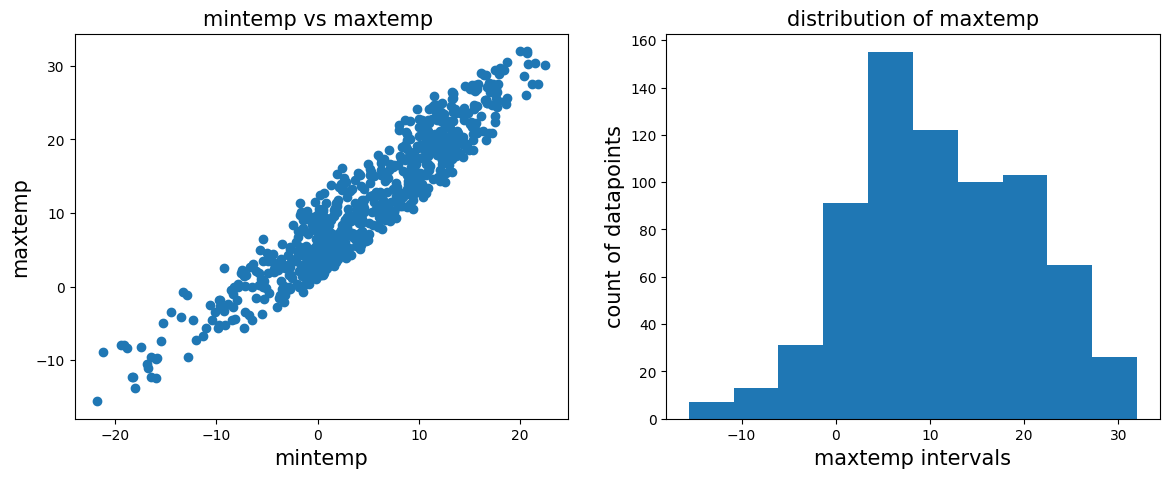

In [63]:
# Visualize data
fig, axes = plt.subplots(1, 2, figsize=(14,5)) # create a figure with two axes (1 row,2 columns) on it
axes[0].scatter(data['MinTemp'],data['MaxTemp']) # plot a scatter plot on axes[0] to show the relation between MinTemp and MaxTemp
axes[0].set_xlabel("mintemp",size=15)
axes[0].set_ylabel("maxtemp",size=15)
axes[0].set_title("mintemp vs maxtemp ",size=15)

axes[1].hist(data['MaxTemp']) # plot a hist plot to show the distribution of MaxTemp
axes[1].set_title('distribution of maxtemp',size=15)
axes[1].set_ylabel("count of datapoints",size=15)
axes[1].set_xlabel("maxtemp intervals",size=15)
plt.show()


<div class=" alert alert-warning">

## Student Task A1.8

Consider the dataset that we have loaded in the previous Student Task A2.1. We have stored the feature values and label values of the datapoints in the numpy array `X` and `y`, respectively. This task requires you to learn a linear map $h(x) = w_{0} + w_{1}x$ that allows to predict the label of datapoint based on its feature. To this end we will use the numpy arrays `X` and `y` from the previous task as a training set. 

The class [`LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) provides methods to search for optimal weights $w_{0}$ and $w_{1}$ from a linear hypothesis space: $$
\mathcal{H}^{(n)}_{\rm linear} := \big\{ h: \mathbb{R} \mapsto \mathbb{R} : h({\bf x}) = \mathbf{w}^T\mathbf{x} 
=
\begin{bmatrix} w_0 & w_1 \end{bmatrix}
\begin{bmatrix} 1 \\ x \end{bmatrix}
= w_0\cdot 1 + w_1x,\  w_{0},w_{1} \in \mathbb{R} \big\},
$$such that the resulting average squared error loss on a given set of datapoints is minimal. In particular, the method [LinearRegression.fit()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) solves the optimization (training) problem 
   $$ \min_{w_{1},w_{0} \in \mathbb{R}} (1/m)\sum_{i=1}^{m} \big (y^{(i)} - \underbrace{\big( w_{0} + w_{1} x^{(i)} \big)}_{=h\big(x^{(i)}\big)} \big)^{2}$$
    
<strong><i><u>Your task<i></u></strong> is to use the `LinearRegression.fit()` method to find the optimal parameters $w_{0}$ and $w_{1}$ and then compute the resulting predicted labels $\hat{y}^{(i)}$ using the feature values in `X` (the features from the training set). You can use the method `LinearRegression.predict()` for computing the predicted labels. The predicted labels should be stored in the one-dimensional `numpy` array `y_pred` which has the same shape as `y` (from the previous student task). Based on the predicted labels you should also calculate the resulting training error $$(1/m) \sum_{i=1}^{m} \big(\hat{y}^{(i)} - y^{(i)} \big)^2.$$
    
Hints: you might find the function [mean_squared_error()](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error) useful for computing the training error. 
</div>

In [64]:
## 1. Fit a linear regression model
# regr = ...
# regr.fit(...)

## 2.Predict label values based on features and calculate the training error
# y_pred = ...   
# tr_error = ...

# 1. Fit a linear regression model
regr = LinearRegression()   # create a linear regression model
regr.fit(X,y)   # fit the model on the training data

# 2. Predict label values based on features and calculate the training error
y_pred = regr.predict(X)   # predict the label values based on the features
tr_error = mean_squared_error(y, y_pred)   # calculate the training error

print('The training error is: ', tr_error)    # print the training error
print("w1 = ", regr.coef_)   # print the learnt w1
print("w0 = ",regr.intercept_) # print the learnt w0

The training error is:  9.969818232805473
w1 =  [1.06990194]
w0 =  6.207368376556122


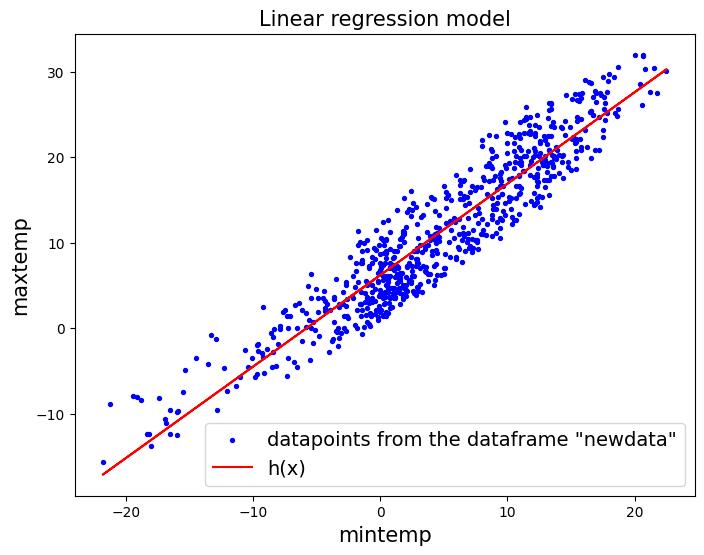

In [65]:
## visualize the model you have learnt, you are supposed to see the datapoints and the fitted h(x), a straignt line

plt.figure(figsize=(8, 6))    # create a new figure with size 8*6

# create a scatter plot of datapoints 
# each datapoint is depicted by a dot in color 'blue' and size '10'
plt.scatter(X, y, color='b', s=8, label='datapoints from the dataframe "newdata"') 

# plot the predictions obtained by the learnt linear hypothesis using color 'red' and label the curve as "h(x)"
y_pred = regr.predict(X)    # predict using the linear model
plt.plot(X, y_pred, color='r', label='h(x)')  

plt.xlabel('mintemp',size=15) # define label for the horizontal axis 
plt.ylabel('maxtemp',size=15) # define label for the vertical axis 

plt.title('Linear regression model',size=15) # define the title of the plot   
plt.legend(loc='best',fontsize=14) # define the location of the legend  

plt.show()  # display the plot on the screen 


In [ ]:
# this cell is for tests


<div class=" alert alert-warning">

## Student Task A1.9
    
Consider datapoints with a single numeric feature $x$ and numeric label $y$. When the relation $x \mapsto y$ between feature $x$ and label $y$ is non-linear, it might be useful to use a hypothesis space which is constituted by non-linear maps (a non-linear model). 

One basic, yet very useful, non-linear model is constituted by polynomials of given (maximum) degree n,
$$
\mathcal{H}^{(n)}_{\rm poly} = \big\{ h: \mathbb{R} \mapsto \mathbb{R} : h(x)
=
\begin{bmatrix} w_0 & w_1 & \cdots & w_{n} \end{bmatrix}
\begin{bmatrix} 1 \\ x \\ \vdots \\ x^{n} \end{bmatrix}
=
\sum_{l=0}^{n} w_{l} x^{l},\  w_{0},\ldots,w_{n} \in \mathbb{R} \big\}.
$$
It is obvious that if we set the degree $n$ of a polynomial hypothesis to 1, then this polynomial hypothesis boils down to a linear hypothesis.

We then learn the weights of the polynomial to minimize the average loss of the hypothesis on a training set. 

Instead of designing a new algorithm for optimizing the parameters of the polynomial we will re-use the algorithm for linear regression. The idea is to represent a polynomial as the concatentation of a feature map (transformation) and a linear map (which are used in linear regression). 

Any polynomial predictor $h(x) \in \mathcal{H}^{(n)}_{poly}$ is the concatenation of the feature map
\begin{equation}
x\mapsto \phi(x) := \underbrace{\big(1, x, ..., x^n\big)^T}_{\text{ new feature vector $\mathbf{x}$}} \in \mathbb{R}^{n+1}
\end{equation}
with some linear map $\tilde{h}:\mathbb{R}^{n+1} \rightarrow \mathbb{R}:x \mapsto \mathbf{w}^T \phi(x)$, i.e.,
\begin{equation}
h(x)=\tilde{h}(\phi(x))
\end{equation}

Thus, we can implement polynomial regression by a two-step procedure: 

* Step 1: Consider a set of $m$ datapoints (the training set). Each datapoint is characterized by a feature $x^{(i)}$. From this feature, compute the feature vector 
\begin{equation}
\mathbf{x}^{(i)}=\phi(x^{(i)})=(1, x^{(i)}, ..., (x^{(i)})^{n})^T \in \mathbb{R}^{n+1}. 
\end{equation}
Stack these feature vectors into a feature matrix $\mathbf{X} = \big(\mathbf{x}^{(1)},\ldots,\mathbf{x}^{(m)}\big)$. 

* Step 2: We then apply linear regression to the features in $\mathbf{X}$. 

<strong><i><u>Your task<i></u></strong> is to use the same feature `X` and label `y` in Task 2.2 to fit polynomial regression models with varying degrees d=3, 5, 10. The `scikit-learn` class [`PolynomialFeatures()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomial#sklearn.preprocessing.PolynomialFeatures) allows to construct polynomial features via generating powers of a scalar feature. The method `PolynomialFeatures.fit_transform()` is for fitting and transforming the raw features. The classes of linear regression and training loss are the same as in task A2.2.

</div>

(713, 1)
Polynomial degree =  3
The first two rows of X_poly: 
 [[  1.     -2.6     6.76  -17.576]
 [  1.      1.8     3.24    5.832]]

The learned weights: 
 [ 5.66167983e+00  1.04645213e+00  8.75902040e-03 -1.27473569e-04]


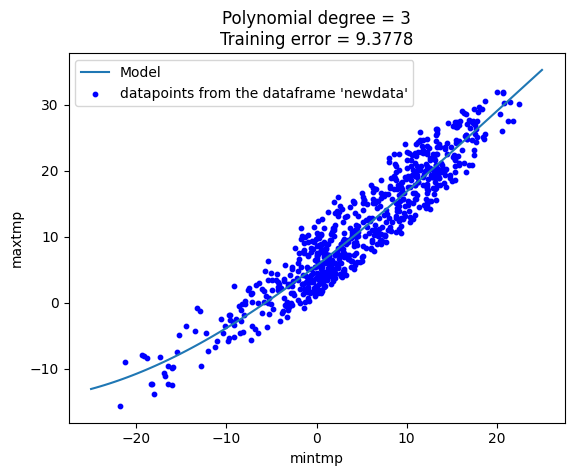

Polynomial degree =  5
The first two rows of X_poly: 
 [[   1.        -2.6        6.76     -17.576     45.6976  -118.81376]
 [   1.         1.8        3.24       5.832     10.4976    18.89568]]

The learned weights: 
 [ 5.54138025e+00  1.00038517e+00  1.50842415e-02  1.43485632e-04
 -2.02506416e-05 -3.35108778e-07]


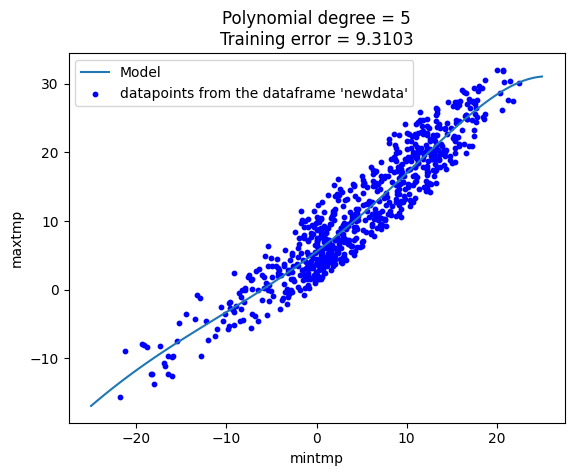

Polynomial degree =  10
The first two rows of X_poly: 
 [[ 1.00000000e+00 -2.60000000e+00  6.76000000e+00 -1.75760000e+01
   4.56976000e+01 -1.18813760e+02  3.08915776e+02 -8.03181018e+02
   2.08827065e+03 -5.42950368e+03  1.41167096e+04]
 [ 1.00000000e+00  1.80000000e+00  3.24000000e+00  5.83200000e+00
   1.04976000e+01  1.88956800e+01  3.40122240e+01  6.12220032e+01
   1.10199606e+02  1.98359290e+02  3.57046723e+02]]

The learned weights: 
 [ 5.39495695e+00  9.57799613e-01  2.88887655e-02  6.66256801e-04
 -9.71738525e-05 -1.08726773e-06 -4.27938855e-07 -2.93920220e-09
  2.82296317e-09  5.31490477e-12 -3.58846286e-12]


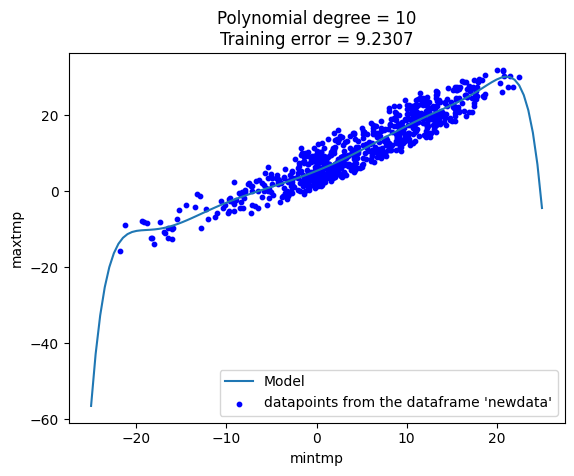

In [67]:
## define a list of values for polynomial degrees 
degrees = [3, 5,10]    

# declare a variable to store the resulting training errors for each polynomial degree
tr_errors = []          
print(X.shape)
for i in range(len(degrees)):    # use for-loop to fit polynomial regression models with different degrees
    
    print("Polynomial degree = ",degrees[i])

    poly = PolynomialFeatures(degree=degrees[i])# initialize a polynomial feature transformer 
    X_poly = poly.fit_transform(X, y) # fit and transform the raw features
    
    lin_regr = LinearRegression(fit_intercept=False) # NOTE: "fit_intercept=False" as we already have a constant iterm in the new feature X_poly
    lin_regr.fit(X_poly, y)    # fit linear regression to these new features and labels (labels remain same)
    
    y_pred = lin_regr.predict(X_poly)    # predict using the learnt linear model
    
    tr_error = mean_squared_error(y, y_pred) # calculate the training error
    
    # sanity check the feature matrix is transformed correctly
    assert X_poly.shape == (X.shape[0],degrees[i]+1), "Wrong polynomial degree" 
    
    print("The first two rows of X_poly: \n",X_poly[0:2])
    
    print("\nThe learned weights: \n",lin_regr.coef_)
    
    tr_errors.append(tr_error)
    X_fit = np.linspace(-25, 25, 100)    # generate samples
    plt.plot(X_fit, lin_regr.predict(poly.transform(X_fit.reshape(-1, 1))), label="Model")    # plot the polynomial regression model
    plt.scatter(X, y, color="b", s=10, label="datapoints from the dataframe 'newdata'")    # plot a scatter plot of y(maxtmp) vs. X(mintmp) with color 'blue' and size '10'
    plt.xlabel('mintmp')    # set the label for the x/y-axis
    plt.ylabel('maxtmp')
    plt.legend(loc="best")    # set the location of the legend
    plt.title('Polynomial degree = {}\nTraining error = {:.5}'.format(degrees[i], tr_error))    # set the title
    plt.show()    # show the plot

In [68]:
# this cell is for tests

# sanity check 
assert len(tr_errors) == 3 # check the length of array tr_errors


<div class=" alert alert-warning">
    
## Student Task A1.10

This task requires you to study the effect of using different amount of training data for a fixed model. We will use polynomial regression with fixed degree 5. We will learn the parameters of the polynomial using a varying amount of datapoints from the dataset as the training set. 

</div>


Number of datapoints in this subset:  71


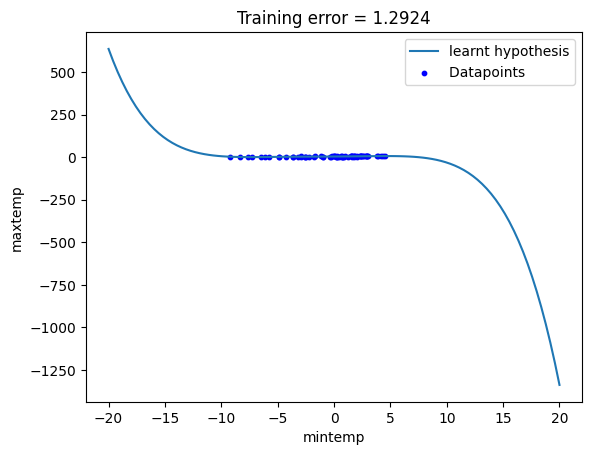


Number of datapoints in this subset:  285


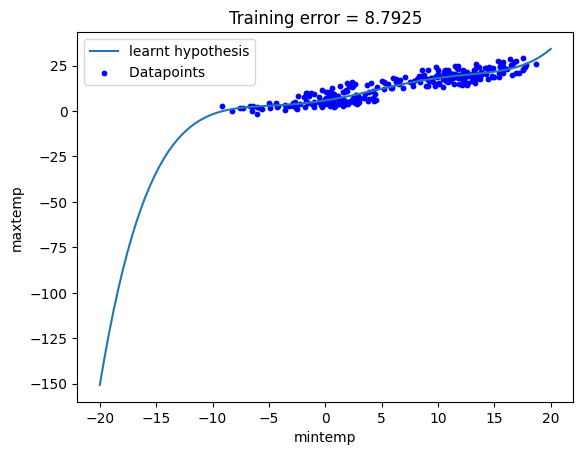


Number of datapoints in this subset:  427


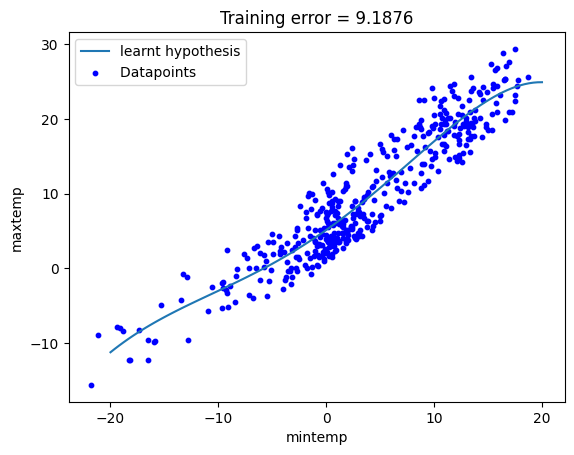

In [71]:
trainingset_size = [0.1, 0.4, 0.6]    # set the different sizes of training set
degree = 5                          # set the degree
tr_errors = []                      # store training errors

for i in range(len(trainingset_size)):    # use for-loop to fit polynomial regression models with different sizes of training set
    index = np.arange(int(len(X)*trainingset_size[i]))
    print("\nNumber of datapoints in this subset: ",len(index))

    X_sub = X[index]    # obtain a subset, NOTE: this is the subset of features you will use for this task
    y_sub = y[index]    # NOTE: this is the subset of labels you will use for this task
    
    ## apply polynomial transformation, train different models and compute MSE on sub_trainingset (X_sub,y_sub) as:
    # poly = ...    # initialize a polynomial feature transformer 
    # X_poly = ...    # fit and transform the raw features, i.e. X_sub
    
    # lin_regr = LinearRegression(fit_intercept=False) # NOTE: "fit_intercept=False" as we already have a constant iterm in the new feature X_poly
    # lin_regr.fit(...,...)    # fit linear regression to these new polynomial features and labels
    
    # y_pred = ...    # predict using the learnt linear model
    # tr_error = ...    # calculate the training error

    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_sub, y_sub)

    lin_regr = LinearRegression(fit_intercept=False)
    lin_regr.fit(X_poly, y_sub)

    y_pred = lin_regr.predict(X_poly)
    tr_error = mean_squared_error(y_sub, y_pred)
    
    tr_errors.append(tr_error)
    X_fit = np.linspace(-20, 20, 100)    # generate samples
    plt.plot(X_fit, lin_regr.predict(poly.transform(X_fit.reshape(-1, 1))), label="learnt hypothesis")        # plot the polynomial regression model
    plt.scatter(X_sub, y_sub, color="b", s=10, label="Datapoints ")    # plot a scatter plot of y(maxtmp) vs. X(mintmp) with color 'blue' and size '10'
    plt.xlabel('mintemp')    # set the label for the x/y-axis
    plt.ylabel('maxtemp')
    plt.legend(loc="best")    # set the location of the legend
    plt.title('Training error = {:.5}'.format(tr_error))    # set the title
    plt.show()    # show the plot

In [72]:
# this cell is for tests

# sanity check
assert X_poly.shape[1] == 6, "Wrong dimension, you should use degree=5 for PolynomialFeatures() "
assert len(tr_errors) == 3 # check the shape of the array tr_errors
assert np.isclose(tr_error,9.18756), "Incorrect training error, you might be using a wrong training set"
